In [2]:
#import the basic libraries
import pandas as pd
import numpy as np

In [3]:
pd.options.display.max_rows= None

In [4]:
#import warning
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#load all the datasets we have created previously

load_data_inputs_train=pd.read_csv("/content/drive/MyDrive/loan_data_inputs_train.csv",index_col =0)
load_data_targets_train=pd.read_csv("/content/drive/MyDrive/loan_data_targets_train.csv",index_col =0,header = None)
load_data_inputs_test=pd.read_csv("/content/drive/MyDrive/loan_data_inputs_test.csv",index_col =0)
load_data_targets_test=pd.read_csv("/content/drive/MyDrive/loan_data_targets_test.csv",index_col = 0,header = None)

In [7]:
#print the head of load_data_targets
load_data_targets_train.head()

,1
0,
NaN,good_bad
427211.0,1
206088.0,1
136020.0,1
412305.0,0


In [8]:
#drop the first row as it is string
load_data_targets_train=load_data_targets_train.drop(load_data_targets_train.index[0])

In [9]:
#view the shape of load_data_inputs_train dataframe
load_data_inputs_train.shape

(373028, 338)

In [10]:
#view the shape ofload_data_targets_train dataframe
load_data_targets_train.shape

(373028, 1)

In [11]:
#create a new column outcome(0 or 1) in load_data_inputs_train
load_data_inputs_train['outcome'] = load_data_targets_train

In [12]:
#check the value_counts of outcome
load_data_inputs_train['outcome'].value_counts()

1    233438
1     98812
0     28705
0     12073
Name: outcome, dtype: int64

In [13]:
#type cast outcome as integer
load_data_inputs_train['outcome'] = load_data_inputs_train["outcome"].astype(int)

In [14]:
#check the value_counts of outcome
load_data_inputs_train['outcome'].value_counts()

1    332250
0     40778
Name: outcome, dtype: int64

In [15]:
#check the head of load_data_inputs_train
load_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:25-30,dti:30-35,dti:35-40,dti:>40,mths_since_last_record:Missing,mths_since_last_record:0-90,mths_since_last_record:90-120,mths_since_last_record:120-127,mths_since_last_record:>=127,outcome
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,0,0,0,0,1,0,0,0,0,1
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,0,1,0,0,0,0,1
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,0,1,0,0,0,0,1
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,0,1,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,0,0,0,1,0,0,0,0,0


In [16]:
 #Take only the default cases where outcome = 0
load_data_defaults = load_data_inputs_train[load_data_inputs_train["outcome"] == 0] #taking only defaults

In [17]:
#check the head of load_data_defaults
load_data_defaults.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:25-30,dti:30-35,dti:35-40,dti:>40,mths_since_last_record:Missing,mths_since_last_record:0-90,mths_since_last_record:90-120,mths_since_last_record:120-127,mths_since_last_record:>=127,outcome
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,0,1,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,0,0,0,1,0,0,0,0,0
454638,454638,10494891,12367014,20000,20000,20000.0,36 months,11.99,664.20,B,...,0,0,0,0,1,0,0,0,0,0
222888,222888,1197171,1438165,8500,8500,8500.0,36 months,8.90,269.91,A,...,0,0,0,0,1,0,0,0,0,0
377139,377139,17523141,19645687,4850,4850,4850.0,36 months,16.99,172.90,D,...,1,0,0,0,1,0,0,0,0,0


In [18]:
#check for null values in every column
load_data_defaults.isnull().sum()

Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3046
emp_length                                                          2215
home_ownership                                     

In [19]:
#select only the important features we have created before in preprocessing steps and create a list of those features

feature_selection=[
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NC_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Verified',
'verification_status:Source Verified',
'verification_status:Not Verified',
    'purpose:educ_sm_b_wedd_ren_en_mov_house',
    'purpose:small_business',
    'purpose:educational',
    'purpose:renewable_energy',
    'purpose:moving',
    'purpose:house',
    'purpose:other',
    'purpose:medical',
    'purpose:wedding',
    'purpose:vacation',
    'purpose:debt_consolidation',
    'purpose:home_improvement',
    'purpose:major_purchase',
    'purpose:car',
    'purpose:credit_card',
    'initial_list_status:f',
    'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issued_date:<38',
'mths_since_issued_date:38-39',
'mths_since_issued_date:40-41',
'mths_since_issued_date:42-48',
'mths_since_issued_date:49-52',
'mths_since_issued_date:53-64',
'mths_since_issued_date:65-84',
'mths_since_issued_date:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:20.281',
    'mths_since_earliest_cr_line:<140',
    'mths_since_earliest_cr_line:140-239',
    'mths_since_earliest_cr_line:240-339',
    'mths_since_earliest_cr_line:340-439',
    'mths_since_earliest_cr_line:440-539',
    'mths_since_earliest_cr_line:540-600',
    'mths_since_earliest_cr_line:>600',
    'delinq_2yrs:0',
    'delinq_2yrs:0-3',
    'delinq_2yrs:3-7',
    'delinq_2yrs:7-9',
    'delinq_2yrs:9-11',
    'delinq_2yrs:11-12',
    'delinq_2yrs:12-18',
    'delinq_2yrs:>18',
    'inq_last_6mths:0',
    'inq_last_6mths:0-3',
    'inq_last_6mths:3-7',
    'inq_last_6mths:7-9',
    'inq_last_6mths:9-11',
    'inq_last_6mths:11-12',
    'inq_last_6mths:12-18',
    'inq_last_6mths:18',
    'open_acc:=0',
    'open_acc:0-1',
    'open_acc:1-4',
    'open_acc:4-28',
    'open_acc:28-35',
    'open_acc:35-45',
    'open_acc:>45',
    'pub_rec:0-3',
    'pub_rec:3-6',
    'pub_rec:6-8',
    'pub_rec:8',
    'total_acc:<0',
    'total_acc:0-4',
    'total_acc:4-62',
    'total_acc:62-72',
    'total_acc:72-85',
    'total_acc:>85',
    'acc_now_delinq:<0',
    'acc_now_delinq:0-1',
    'acc_now_delinq:1-2',
    'acc_now_delinq:2-3',
    'acc_now_delinq:3-5',
    'acc_now_delinq:>5',
'annual_inc:<20k',
'annual_inc:20k-30k',
'annual_inc:30k-40k',
'annual_inc:40k-50k',
'annual_inc:50k-60k',
'annual_inc:60k-70k',
'annual_inc:70k-80k',
'annual_inc:80k-90k',
'annual_inc:90k-100k',
'annual_inc:100k-120k',
'annual_inc:120k-140k',
'annual_inc:>140k',
'total_rev_hi_lim:<=5k',
'total_rev_hi_lim:5k_10k',
'total_rev_hi_lim:10k_20k',
'total_rev_hi_lim:20k_30k',
'total_rev_hi_lim:30k_40k',
'total_rev_hi_lim:40k_50k',
'total_rev_hi_lim:50k_65k',
'total_rev_hi_lim:65k_80k',
'total_rev_hi_lim:>80k',
'dti:<5',
'dti:5-10',
'dti:10-15',
'dti:15-20',
'dti:20-25',
'dti:25-30',
'dti:30-35',
'dti:35-40',
'dti:>40',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-90',
'mths_since_last_record:90-120',
'mths_since_last_record:120-127',
'mths_since_last_record:>=127','loan_amnt','funded_amnt','int_rate','installment','recoveries','total_rec_prncp']



In [20]:
#assign them into a inputs_train_with_ref_category with only those columns which are in the list(fetaure selection)
load_data_defaults = load_data_defaults.reindex(feature_selection, axis='columns')

In [21]:
#check for null values in load_data_defaults
load_data_defaults.isnull().sum()

grade:A                                    0
grade:B                                    0
grade:C                                    0
grade:D                                    0
grade:E                                    0
grade:F                                    0
grade:G                                    0
home_ownership:RENT_OTHER_NONE_ANY         0
home_ownership:OWN                         0
home_ownership:MORTGAGE                    0
addr_state:ND_NE_IA_NC_FL_HI_AL            0
addr_state:NM_VA                           0
addr_state:OK_TN_MO_LA_MD_NC               0
addr_state:UT_KY_AZ_NJ                     0
addr_state:AR_MI_PA_OH_MN                  0
addr_state:RI_MA_DE_SD_IN                  0
addr_state:GA_WA_OR                        0
addr_state:WI_MT                           0
addr_state:IL_CT                           0
addr_state:KS_SC_CO_VT_AK_MS               0
addr_state:WV_NH_WY_DC_ME_ID               0
verification_status:Verified               0
verificati

### Recovery Rate:
It is the recovered amount divided by the funded amount

In [22]:
#create a new column recovery_rate i.e 'recoveries'/'funded_amnt'
load_data_defaults['recovery_rate'] = load_data_defaults["recoveries"] / load_data_defaults["funded_amnt"]

In [23]:
#check the statistics of recovery_rate
load_data_defaults["recovery_rate"].describe() #recovery rate has to be from 0 to 1

count    40778.000000
mean         0.051739
std          0.085882
min          0.000000
25%          0.000000
50%          0.000000
75%          0.101866
max          1.207630
Name: recovery_rate, dtype: float64

In [24]:
#convert recovery rate in the range of 0 to 1
load_data_defaults['recovery_rate'] = np.where(load_data_defaults['recovery_rate'] > 1,1,load_data_defaults['recovery_rate'])
load_data_defaults['recovery_rate'] = np.where(load_data_defaults['recovery_rate'] < 0,0,load_data_defaults['recovery_rate'])

In [25]:
#recovery rate 0 to 1
load_data_defaults["recovery_rate"].describe()

count    40778.000000
mean         0.051702
std          0.085447
min          0.000000
25%          0.000000
50%          0.000000
75%          0.101866
max          1.000000
Name: recovery_rate, dtype: float64

### The credit conversion factor (CCF) converts the amount of a free credit line and other off-balance-sheet transactions (with the exception of derivatives) to an EAD (exposure at default) amount.

In [26]:
#credit conversion factor(CCF)
load_data_defaults['CCF'] = (load_data_defaults['funded_amnt'] - load_data_defaults['total_rec_prncp']) / load_data_defaults['funded_amnt']

In [27]:
#CCF has to be in the range of 0 to 1
load_data_defaults["CCF"].describe()

count    40778.000000
mean         0.719456
std          0.204450
min          0.000000
25%          0.608267
50%          0.769332
75%          0.876847
max          1.000000
Name: CCF, dtype: float64

In [28]:
#import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

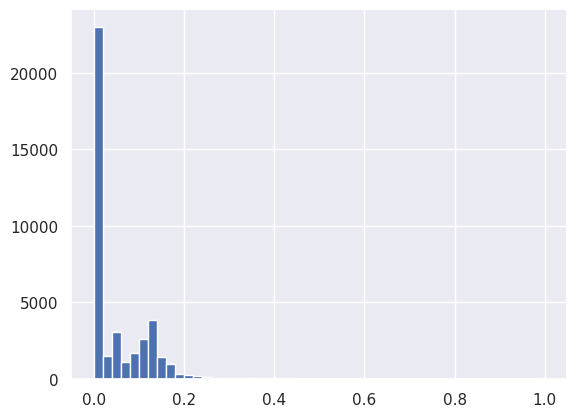

In [29]:
#plot a histogram of recovery_rate with bins=50
plt.hist(load_data_defaults["recovery_rate"],bins = 50)
plt.show()

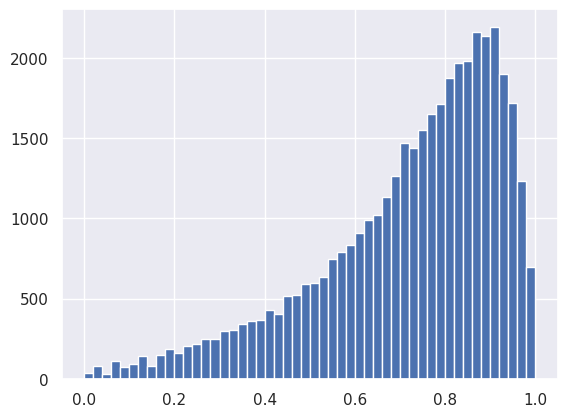

In [30]:
#plot a histogram of CCF with 50 bins
plt.hist(load_data_defaults["CCF"],bins = 50)
plt.show()

In [31]:
#create a new column recovery_rate_0_1...if the recovery_rate is 0 then insert 0 and if it is greater than 0 replace it with 1
load_data_defaults['recovery_rate_0_1']  = np.where(load_data_defaults['recovery_rate'] == 0,0,1)

In [32]:
#value_counts of recovery_rate_0_1
load_data_defaults["recovery_rate_0_1"].value_counts()

0    21276
1    19502
Name: recovery_rate_0_1, dtype: int64

# LGD_Model

In LGD model we will basically create 2 models for determining the recovery rate if the recovery rate is 0 or greater than 0:

1.we will create a logistic regression model for determining whether the recovery rate is 0 or 1.

2.For all the recovery rate greater than 0 we will create a linear regression model to determine how much greater than 0 the value of recovery rate is.

#### Doing The First part: Stage_1

In [33]:
#check the column name of load_data_defaults
load_data_defaults.columns

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 'home_ownership:OWN',
       'home_ownership:MORTGAGE',
       ...
       'mths_since_last_record:>=127', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'recoveries', 'total_rec_prncp', 'recovery_rate', 'CCF',
       'recovery_rate_0_1'],
      dtype='object', length=157)

In [34]:
#Train Test split of load_data_defaults
from sklearn.model_selection import train_test_split

lgd_input_train,lgd_input_test,lgd_target_train,lgd_target_test = train_test_split(load_data_defaults.drop(['recoveries','recovery_rate','recovery_rate_0_1','CCF'],axis=1),load_data_defaults['recovery_rate_0_1'],test_size=0.2,random_state=42)

In [35]:
#create a list of reference categories selecting only one column from each parent column
ref_categories=['grade:G',
               'home_ownership:RENT_OTHER_NONE_ANY',
               'addr_state:ND_NE_IA_NC_FL_HI_AL',
               'verification_status:Verified',
                'purpose:educ_sm_b_wedd_ren_en_mov_house',
                'initial_list_status:f',
                'term:60',
                'emp_length:0',
                'mths_since_issued_date:>84',
                'int_rate:20.281',
                'mths_since_earliest_cr_line:<140',
                'delinq_2yrs:>18',
                'inq_last_6mths:7-9',
                'open_acc:=0',
                'pub_rec:0-3',
                'total_acc:>85',
                'acc_now_delinq:<0',
                'total_rev_hi_lim:<=5k',
                'annual_inc:<20k',
                'dti:>40',
                'mths_since_last_delinq:0-3',
                'mths_since_last_record:Missing'
               ]

In [36]:
#drop the reference categories from lgd_input_train
lgd_input_train = lgd_input_train.drop(ref_categories,axis =1)

In [37]:
#import logistic regression and metrics
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [38]:
#create an object of logistic regression with max_iter=200
reg = LogisticRegression(max_iter =200) #for prediction 0 or 1 via logistic and then how much by linear reg

In [39]:
#check the shape of lgd_inputs_train
lgd_input_train.shape

(32622, 131)

In [40]:
#check the shape of lgd_target_train
lgd_target_train.shape

(32622,)

In [41]:
#fit the logistic reg model on lgd_inputs_train and lgd_target_train
reg.fit(lgd_input_train,lgd_target_train)

LogisticRegression(max_iter=200)

In [42]:
#testing

In [43]:
#check the shape of lgd_input_test
lgd_input_test.shape

(8156, 153)

In [44]:
#drop the reference categories from lgd_input_test
lgd_input_test = lgd_input_test.drop(ref_categories,axis =1)

In [45]:
#check the shape of lgd_input_test ---- make sure that the number of columns used in traing is same as the number of columns in testing
lgd_input_test.shape

(8156, 131)

In [46]:
#predict the results of lgd_input_test
pred = reg.predict(lgd_input_test)

In [47]:
#predict the result using predict_proba function
prob_pred = reg.predict_proba(lgd_input_test)[:][:,1]

In [48]:
#create an empty dataframe that will store the final results
df_actual_predicted_probs = pd.DataFrame()

In [49]:
#create 2 columns one will store the pred and other will store the prob_pred
df_actual_predicted_probs['lgd_test_outcome'] = pred
df_actual_predicted_probs['lgd_test_proba'] = prob_pred

In [50]:
#check the head of the dataframe
df_actual_predicted_probs.head()

,lgd_test_outcome,lgd_test_proba
0,1,0.734807
1,1,0.554669
2,1,0.571423
3,1,0.547397
4,0,0.448636


In [51]:
#You can also get 0 or 1 by defining a threshold value of prob_pred
#tr=0.5
#df_actual_predicted_probs['pred'] = np.where(df_actual_predicted_probs['lgd_test_proba'] > tr,1,0)

In [52]:
#check the shape of df_actual_predicted_probs
df_actual_predicted_probs.shape

(8156, 2)

In [53]:
#print the confusion matrix using lgd_target_test and pred
metrics.confusion_matrix(lgd_target_test,pred)


array([[2981, 1250],
       [1528, 2397]])

In [54]:
#accuracy of model
metrics.accuracy_score(lgd_target_test,pred)

0.6593918587542913

In [55]:
#import pickle
import pickle

In [56]:
#save the reg model
pickle.dump(reg,open('lgd_stage_1.sav','wb'))

stage-2...where >0 linear reg to determine how much >0   for recovery rate

Stage_2:Take those records where recovery_rate_0_1 is 1 and determine the recovery_rate by Linear REG

In [57]:
#take all records from load_data_defaults hwere recovery_rate_0_1 is 1
lgd_loan_data_2 = load_data_defaults[load_data_defaults['recovery_rate_0_1'] == 1]

In [58]:
#check the shape of lgd_loan_data_2
lgd_loan_data_2.shape

(19502, 157)

In [59]:
#train test split
lgd_input_train_2,lgd_input_test_2,lgd_target_train_2,lgd_target_test_2 = train_test_split(lgd_loan_data_2.drop(['recoveries','recovery_rate','recovery_rate_0_1','CCF'],axis=1),lgd_loan_data_2['recovery_rate'],test_size=0.2,random_state=42)

In [60]:
#drop the refrence categories from lgd_input_train_2
lgd_input_train_2 =lgd_input_train_2.drop(ref_categories,axis =1)

In [61]:
#import linear regression
from sklearn.linear_model import LinearRegression

In [62]:
#create an object  of linear regression
lin_reg =LinearRegression()

In [63]:
#fit the lin_reg on lgd_input_train_2,lgd_target_train_2
lin_reg.fit(lgd_input_train_2,lgd_target_train_2)

LinearRegression()

In [64]:
#drop the refrence categories from lgd_input_test
lgd_input_test_2 = lgd_input_test_2.drop(ref_categories,axis =1)

In [65]:
#check the shape of lgd_input_test_2...make sure the number of columns are same as that of lgd_input_train_2
lgd_input_test_2.shape

(3901, 131)

In [66]:
#predict the results
pred_lin = lin_reg.predict(lgd_input_test_2)

In [67]:
#print the predicted results
pred_lin

array([0.13567379, 0.06718956, 0.09462008, ..., 0.12465915, 0.07248101,
       0.08528765])

In [68]:
#check the r2_score
metrics.r2_score(lgd_target_test_2,pred_lin)

0.12478323688471715

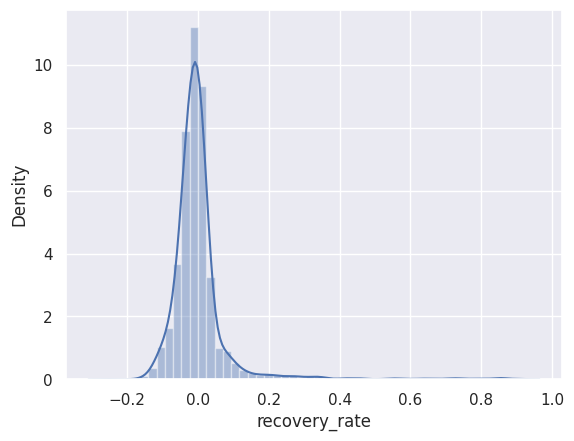

In [69]:
#plot the distribution plot for lgd_target_test_2-pred_lin
sns.distplot(lgd_target_test_2-pred_lin)

plt.show()

In [70]:
#save the model using pickle
pickle.dump(lin_reg,open('lgd_stage_2.sav','wb'))

# combination of stage1 and stage2

we will multiply the results of stage_1 and stage_2

In [71]:
#using the ln_reg method predict the results of stage_1 test i.e lgd_input_test
pred_stage_2_all = lin_reg.predict(lgd_input_test)

In [72]:
#print the pred_stage_2_all
pred_stage_2_all

array([0.06618586, 0.04787434, 0.15914674, ..., 0.07241948, 0.10081735,
       0.14634088])

In [73]:
#make sure that the length of pred and pred_stage_2_all is same becoz we will combine the results by multiplying them
print(len(pred),len(pred_stage_2_all))

8156 8156


In [74]:
#multiply the stage_1 and stage_2 results
pred_lgd_final = pred * pred_stage_2_all

In [75]:
#print the pred_lgd_final
pred_lgd_final

array([0.06618586, 0.04787434, 0.15914674, ..., 0.07241948, 0.10081735,
       0.        ])

In [76]:
 #check the basic stats of pred_lgd_final
pd.DataFrame(pred_lgd_final).describe()

,0
count,8156.000000
mean,0.046905
std,0.056774
min,-0.000001
25%,0.000000
50%,0.000000
75%,0.097783
max,0.294530


# EAD MODEL

In [77]:
#check the columns of load_data_defaults
load_data_defaults.columns

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 'home_ownership:OWN',
       'home_ownership:MORTGAGE',
       ...
       'mths_since_last_record:>=127', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'recoveries', 'total_rec_prncp', 'recovery_rate', 'CCF',
       'recovery_rate_0_1'],
      dtype='object', length=157)

In [78]:
#Train test split using the CCF as output feature
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(load_data_defaults.drop(['recoveries','recovery_rate','recovery_rate_0_1','CCF'],axis=1),load_data_defaults['CCF'],test_size=0.2,random_state=42)

In [79]:
#drop the refrence categories
ead_inputs_train =ead_inputs_train.drop(ref_categories,axis = 1)

In [80]:
#create an object of linear regression and fit it on ead_inputs_train,ead_targets_train
reg_ead =LinearRegression()
reg_ead.fit(ead_inputs_train,ead_targets_train)

LinearRegression()

In [81]:
#drop the refrence categories from ead_inputs_test
ead_inputs_test =ead_inputs_test.drop(ref_categories,axis =1)

In [82]:
#predict the results of ead_inputs_test
y_pred_test_ead = reg_ead.predict(ead_inputs_test)

In [83]:
#print the results
y_pred_test_ead

array([0.55958399, 0.37705677, 0.90225855, ..., 0.66296642, 0.89692882,
       0.89477416])

<Axes: xlabel='CCF', ylabel='Density'>

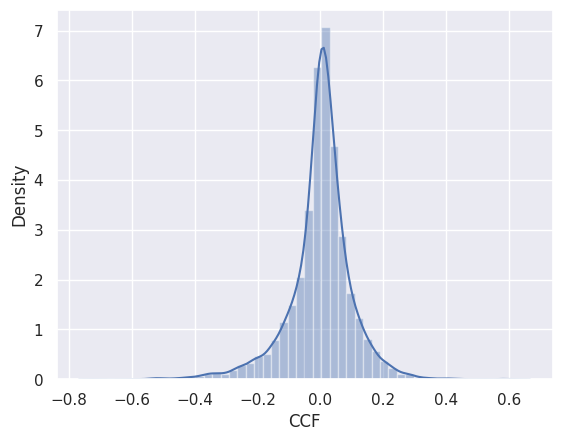

In [84]:
#plot the distribution plot of ead_targets_test-y_pred_test_ead
sns.distplot(ead_targets_test-y_pred_test_ead)

In [85]:
#chekc the basic stats of y_pred_test_ead
pd.DataFrame(y_pred_test_ead).describe()

,0
count,8156.000000
mean,0.720407
std,0.174406
min,-0.602701
25%,0.634794
50%,0.731027
75%,0.832212
max,1.286389


We see that some values are negitive and this predicted value is of CCF...so it can't be negitive

In [86]:
#replace all the negitive values with 0 and all values which are greater than 1 with 1
y_pred_test_ead = np.where(y_pred_test_ead < 0,0,y_pred_test_ead)
y_pred_test_ead = np.where(y_pred_test_ead > 1,1,y_pred_test_ead)

In [87]:
#save the EAD model
pickle.dump(reg_ead,open('ead_model.sav','wb'))

In [88]:
#now again check the basic stats of y_pred_test_ead
pd.DataFrame(y_pred_test_ead).describe()

,0
count,8156.000000
mean,0.719043
std,0.166765
min,0.000000
25%,0.634794
50%,0.731027
75%,0.832212
max,1.000000


# Calculating EL:

### Expected Loss = PD * LGD * EAD

In [89]:
#check the shape of lgd_input_test
lgd_input_test.shape

(8156, 131)

In [90]:
#check the shape of lgd_target_test
lgd_target_test.shape

(8156,)

In [91]:
#Take a testing sample as lgd_input_test and predict the EXPECTED LOSS
testing_sample = lgd_input_test

In [92]:
#check the shape of testing_sample
testing_sample.shape

(8156, 131)

In [93]:
#create an empty dataframe that will store the final results
testing_outcome = pd.DataFrame()

In [94]:
#create 2 columns for prediction of LGD_stage_1 and LGD_stage_2
testing_outcome['recovery_rate_stage_1'] = reg.predict(testing_sample) # Logistic Regression model
testing_outcome['recovery_rate_stage_2'] = lin_reg.predict(testing_sample) # Linear Regression model

In [95]:
#create a new column recovery_rate that will have the fianl results of LGD_Model i.e the combition of stage_1 and stage_2
testing_outcome['recovery_rate'] = testing_outcome["recovery_rate_stage_1"] * testing_outcome["recovery_rate_stage_2"]

In [96]:
#check the head of testing_outcome
testing_outcome.head()

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate
0,1,0.066186,0.066186
1,1,0.047874,0.047874
2,1,0.159147,0.159147
3,1,0.057790,0.057790
4,0,0.094851,0.000000


In [97]:
#replace all the negitive values in recovery_rate with 0 and all values which are greater than 1 with 1
testing_outcome['recovery_rate'] = np.where(testing_outcome["recovery_rate"] < 0,0 ,testing_outcome["recovery_rate"])
testing_outcome['recovery_rate'] = np.where(testing_outcome["recovery_rate"] > 1,1 , testing_outcome["recovery_rate"])

In [98]:
#create a new column LGD in testing_outcome i.e (1-recovery_rate)
testing_outcome['LGD'] = 1 - testing_outcome["recovery_rate"]
testing_outcome.head()

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD
0,1,0.066186,0.066186,0.933814
1,1,0.047874,0.047874,0.952126
2,1,0.159147,0.159147,0.840853
3,1,0.057790,0.057790,0.942210
4,0,0.094851,0.000000,1.000000


In [99]:
#check the basic stats of LGD
testing_outcome["LGD"].describe()

count    8156.000000
mean        0.953095
std         0.056774
min         0.705470
25%         0.902217
50%         1.000000
75%         1.000000
max         1.000000
Name: LGD, dtype: float64

In [100]:
#create a new column CCF that will store the predicted results of EAD_Model
testing_outcome['CCF'] = reg_ead.predict(testing_sample)

In [101]:
#check the basic stats of CCF
testing_outcome["CCF"].describe()

count    8156.000000
mean        0.720407
std         0.174406
min        -0.602701
25%         0.634794
50%         0.731027
75%         0.832212
max         1.286389
Name: CCF, dtype: float64

In [102]:
#replace all the negitive values in CCF with 0 and all values which are greater than 1 with 1
testing_outcome['CCF'] = np.where(testing_outcome["CCF"] < 0,0,testing_outcome["CCF"])
testing_outcome['CCF'] = np.where(testing_outcome["CCF"] > 1,1,testing_outcome["CCF"])

In [103]:
#check the basic stats of CCF
testing_outcome["CCF"].describe()

count    8156.000000
mean        0.719043
std         0.166765
min         0.000000
25%         0.634794
50%         0.731027
75%         0.832212
max         1.000000
Name: CCF, dtype: float64

In [104]:
#check the shape of testing_outcome
testing_outcome.shape

(8156, 5)

In [105]:
#check the shape of testing_sample
testing_sample.shape

(8156, 131)

In [106]:
#create a new column EAD i.e (CCF * funded_amt)
testing_outcome['EAD'] = testing_outcome['CCF'] * testing_sample['funded_amnt'].values

In [107]:
#check the head of testing_outcome
testing_outcome.head()

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD,CCF,EAD
0,1,0.066186,0.066186,0.933814,0.559584,8393.759820
1,1,0.047874,0.047874,0.952126,0.377057,4524.681272
2,1,0.159147,0.159147,0.840853,0.902259,15631.629299
3,1,0.057790,0.057790,0.942210,0.513916,2569.582343
4,0,0.094851,0.000000,1.000000,0.621515,4739.051819


In [108]:
#check the basic stats of EAD
testing_outcome["EAD"].describe()

count     8156.000000
mean     10727.507775
std       7520.667245
min          0.000000
25%       5047.833926
50%       8699.416475
75%      14500.978291
max      35000.000000
Name: EAD, dtype: float64

## Calculate results of PD_Model

In [109]:
#check the columns of testing_sample
testing_sample.columns

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE', 'addr_state:NM_VA',
       'addr_state:OK_TN_MO_LA_MD_NC',
       ...
       'mths_since_last_delinq:>=57', 'mths_since_last_record:0-90',
       'mths_since_last_record:90-120', 'mths_since_last_record:120-127',
       'mths_since_last_record:>=127', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'total_rec_prncp'],
      dtype='object', length=131)

### Make sure you pass only those columns to the PD_Model which you have passed in PD_Model while model training

In [110]:
#Drop total_rec_prncp column as we didn't pass this in PD_Model while model training
testing_sample.drop('total_rec_prncp',axis=1,inplace=True)

In [111]:
#load the PD_model which we have created Earlier
reg_pd = pickle.load(open('/content/drive/MyDrive/pd_model_random.sav','rb'))

In [112]:
#predict the results of testing_sample using the PD_model
reg_pd.predict_proba(testing_sample)[:][:,0]

array([0.46216778, 0.45419747, 0.55219131, ..., 0.4432829 , 0.47460223,
       0.30532958])

In [114]:
#predict the predict_proba results of testing_sample using PD_Model and store it in 'PD'
testing_outcome['PD'] = reg_pd.predict_proba(testing_sample)[:][:,0]

In [115]:
#check the hed of testing_outcome
testing_outcome.head()

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD,CCF,EAD,PD
0,1,0.066186,0.066186,0.933814,0.559584,8393.759820,0.462168
1,1,0.047874,0.047874,0.952126,0.377057,4524.681272,0.454197
2,1,0.159147,0.159147,0.840853,0.902259,15631.629299,0.552191
3,1,0.057790,0.057790,0.942210,0.513916,2569.582343,0.399047
4,0,0.094851,0.000000,1.000000,0.621515,4739.051819,0.368294


In [117]:
#check the basic stats of PD
testing_outcome["PD"].describe() # PD means Probability at Default

count    8156.000000
mean        0.400697
std         0.070825
min         0.186167
25%         0.349354
50%         0.397407
75%         0.449489
max         0.675918
Name: PD, dtype: float64

In [118]:
#create a new column 'EL' i.e Expected_Loss by ('PD' * 'LGD' * 'EAD')
testing_outcome['EL'] =testing_outcome["PD"] * testing_outcome["LGD"] * testing_outcome["EAD"]

In [119]:
#check the head of testing_outcome
testing_outcome.head()

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD,CCF,EAD,PD,EL
0,1,0.066186,0.066186,0.933814,0.559584,8393.759820,0.462168,3622.568843
1,1,0.047874,0.047874,0.952126,0.377057,4524.681272,0.454197,1956.712318
2,1,0.159147,0.159147,0.840853,0.902259,15631.629299,0.552191,7257.950945
3,1,0.057790,0.057790,0.942210,0.513916,2569.582343,0.399047,966.126326
4,0,0.094851,0.000000,1.000000,0.621515,4739.051819,0.368294,1745.362260


In [120]:
#Add the column 'funded_amnt' from testing_sample to testing_outcome
testing_outcome['Funded_amt'] = testing_sample['funded_amnt'].values

In [121]:
#check the head of testing_outcome
testing_outcome.head()

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD,CCF,EAD,PD,EL,Funded_amt
0,1,0.066186,0.066186,0.933814,0.559584,8393.759820,0.462168,3622.568843,15000
1,1,0.047874,0.047874,0.952126,0.377057,4524.681272,0.454197,1956.712318,12000
2,1,0.159147,0.159147,0.840853,0.902259,15631.629299,0.552191,7257.950945,17325
3,1,0.057790,0.057790,0.942210,0.513916,2569.582343,0.399047,966.126326,5000
4,0,0.094851,0.000000,1.000000,0.621515,4739.051819,0.368294,1745.362260,7625


In [125]:
#Finally, create a new_dataframe testing_outcome_final which will have only 'Funded_amt','PD','LGD','EAD','EL'
testing_outcome_final = testing_outcome[["Funded_amt","PD","LGD","EAD","EL"]]
testing_outcome_final.head()

# Funded Amount
# Probability of Default (PD)
# Loss Given Default (LGD)
# Exposure AT Default (EAD)
# Expected Loss (EL)

,Funded_amt,PD,LGD,EAD,EL
0,15000,0.462168,0.933814,8393.759820,3622.568843
1,12000,0.454197,0.952126,4524.681272,1956.712318
2,17325,0.552191,0.840853,15631.629299,7257.950945
3,5000,0.399047,0.942210,2569.582343,966.126326
4,7625,0.368294,1.000000,4739.051819,1745.362260


record:0---When the Funded amount is 15000 USD the bank suffers a loss of 3622.5 USD from that customer.

record:1---When the Funded amount is 12000 USD the bank suffers a loss of 1956.7 USD from that customer.

record:3---When the Funded amount is 17325 USD the bank suffers a loss of 7257.9 USD from that customer.


and so on......



## We will get the overall expected_loss suffered by the bank

In [126]:
#Divide the  expected_loss sum by funded_amnt sum
testing_outcome_final['EL'].sum()/testing_outcome_final['Funded_amt'].sum()

0.282680064332519

We observe that the Bank suffers an Expected loss of 28.2% while giving loans to it's customers

#Observed Expected Loss is between 15% to 30% based on this banks can be aggressive or lenient while giving loans.

# Thank you